# Create dataset

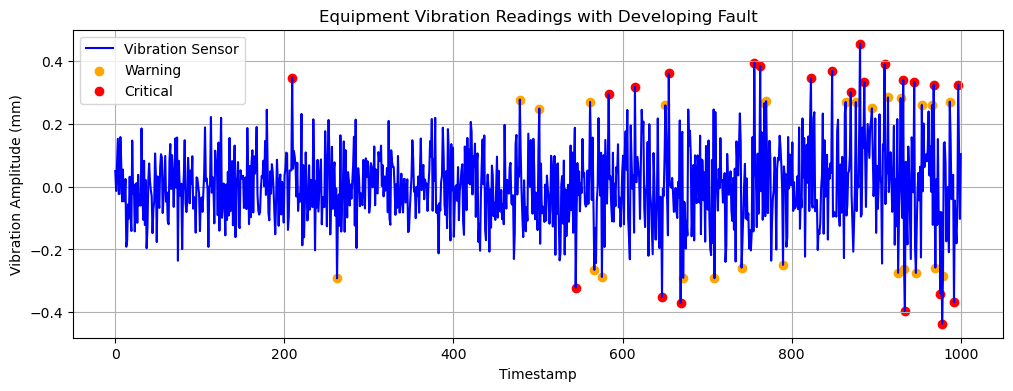

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generate synthetic sensor data (vibration readings with impending failure)
np.random.seed(42)
time_points = 1000
normal_operation =  0.1 * np.random.randn(500)

mean = normal_operation.mean()
std = normal_operation.std()
for i in range(len(normal_operation)):
    if abs(normal_operation[i]) > mean + 2.5 * std:
        normal_operation[i] = normal_operation[i]*0.9

developing_fault =  0.13 * np.random.randn(150)
developing_fault2 = 0.14 * np.random.randn(100)
developing_fault3 = 0.15 * np.random.randn(130)
developing_fault4 = 0.18 * np.random.randn(120)
sensor_data = np.concatenate([normal_operation, developing_fault,developing_fault2, developing_fault3, developing_fault4])

# Create labels (0 = normal, 1 = warning, 2 = critical)
labels = np.zeros_like(sensor_data)

for i in range(len(sensor_data)):
    if abs(sensor_data[i]) > mean + 3 * std:
        labels[i] = 2
    elif abs(sensor_data[i]) > mean + 2.5 * std:
        labels[i] = 1


# Create DataFrame
maintenance_df = pd.DataFrame({
    'timestamp': np.linspace(0, 1000, len(sensor_data)),
    'vibration': sensor_data,
    'label': labels
})
maintenance_df.set_index('timestamp', inplace=True)

# Plot the data
plt.figure(figsize=(12, 4))
plt.plot(maintenance_df.index, maintenance_df['vibration'],
         label='Vibration Sensor', color='blue')
plt.scatter(maintenance_df.index[maintenance_df['label'] == 1],
            maintenance_df['vibration'][maintenance_df['label'] == 1],
            color='orange', label='Warning')
plt.scatter(maintenance_df.index[maintenance_df['label'] == 2],
            maintenance_df['vibration'][maintenance_df['label'] == 2],
            color='red', label='Critical')
plt.title('Equipment Vibration Readings with Developing Fault')
plt.xlabel('Timestamp')
plt.ylabel('Vibration Amplitude (mm)')
plt.legend()
plt.grid(True)
plt.show()


# Modeling - Decision Tree

C:\Users\rafae\AppData\Local\Temp\ipykernel_15952\1687378384.py:14: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  X_train = X[:int(0.8*len(X))]
C:\Users\rafae\AppData\Local\Temp\ipykernel_15952\1687378384.py:15: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  X_test = X[int(0.8*len(X)):]
C:\Users\rafae\AppData\Local\Temp\ipykernel_15952\1687378384.py:17: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  y_train = y[:int(0.8*len(y))]
C:\Users\rafae\AppData\Local\Temp\ipykernel_15952\1687378384.py:18: Fut


Train Accuracy: 1.0

Test Accuracy: 1.0

Training Confusion Matrix:


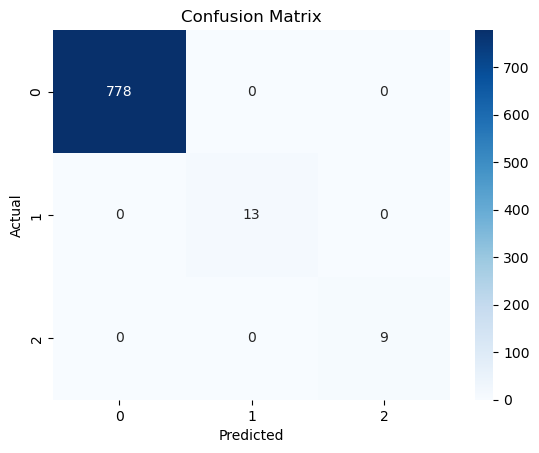


Test Confusion Matrix:


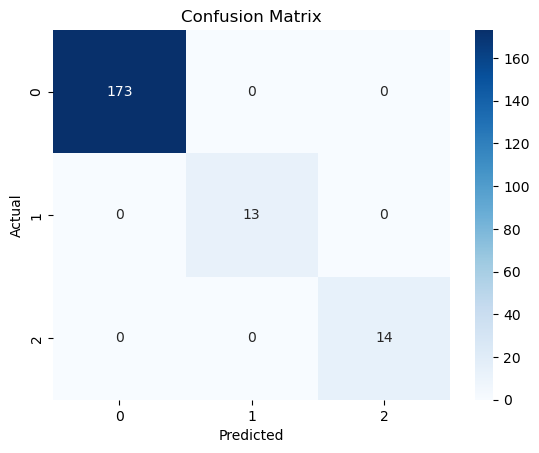

In [6]:
# prepare Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix


X = maintenance_df[['vibration']]
y = maintenance_df['label']


X_train = X[:int(0.8*len(X))]
X_test = X[int(0.8*len(X)):]

y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]

model = DecisionTreeClassifier( random_state=42)
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
accuracy = accuracy_score(y_train, pred_train)
print("\nTrain Accuracy:", accuracy)

pred_test = model.predict(X_test)
accuracy = accuracy_score(y_test, pred_test)
print("\nTest Accuracy:", accuracy)


import seaborn as sns
print("\nTraining Confusion Matrix:")

sns.heatmap(confusion_matrix(y_train, pred_train), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nTest Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

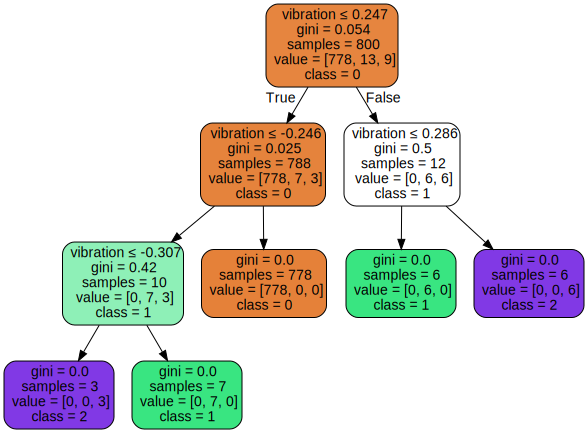

In [7]:
## plot decision tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None,
                         feature_names=['vibration'],
                         class_names=['0', '1', '2'],
                         filled=True, rounded=True,
                         special_characters=True)

graph = graphviz.Source(dot_data)
graph

# Evaluating


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       173
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        14

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



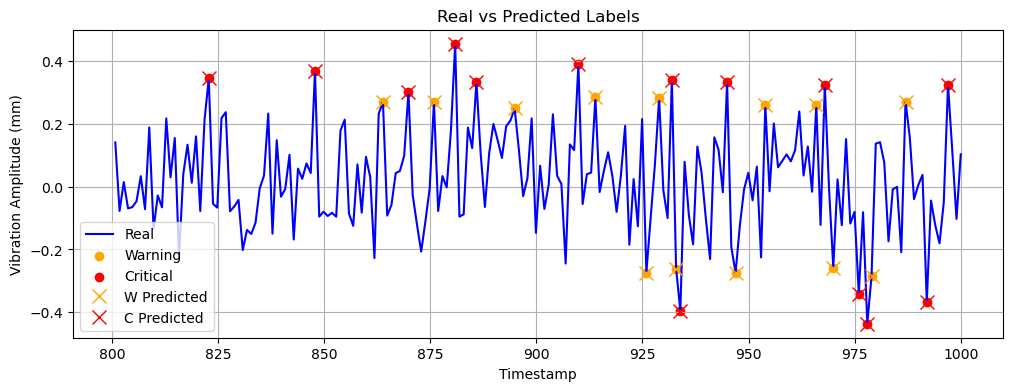

In [4]:
# Evaluate the model
y_pred = model.predict(X_test)

pred_series = pd.DataFrame({
    'timestamp': X_test.index,
    'label': y_test,
    'prediction': y_pred,
    'vibration': X_test['vibration']
})

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




# Plot real vs predicted
plt.figure(figsize=(12, 4))

plt.plot(X_test.index, X_test, label='Real', color='blue')
plt.scatter(pred_series.index[ pred_series.label == 1],
            pred_series.vibration[ pred_series.label == 1],
            color='orange', label='Warning')

plt.scatter(pred_series.index[ pred_series.label == 2],
            pred_series.vibration[ pred_series.label == 2],
            color='red', label='Critical')

plt.plot(pred_series.index[ pred_series.prediction == 1],
         pred_series.vibration[ pred_series.prediction == 1],
         label='W Predicted', color='orange', marker='x',
         markeredgecolor='orange', markersize=10, linestyle='none')

plt.plot(pred_series.index[ pred_series.prediction == 2],
         pred_series.vibration[ pred_series.prediction == 2],
         label='C Predicted', color='red', marker='x',
         markeredgecolor='red', markersize=10, linestyle='none')

plt.title('Real vs Predicted Labels')
plt.xlabel('Timestamp')
plt.ylabel('Vibration Amplitude (mm)')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\rafae\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


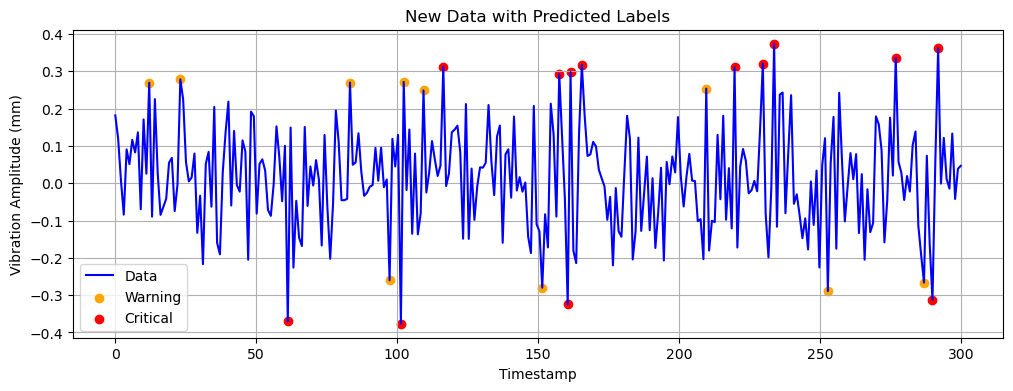

In [5]:
## New data to predict
new_period = np.linspace(0, 300, 300)

new_data1 = 0.13 * np.random.randn(200)
new_data2 = 0.145 * np.random.randn(100)
new_data = np.concatenate([new_data1, new_data2])

new_pred = model.predict(new_data.reshape(-1, 1))


new_data = pd.DataFrame({
    'timestamp': new_period,
    'vibration': new_data,
    'label': new_pred
})
new_data.set_index('timestamp', inplace=True)

plt.figure(figsize=(12, 4))
plt.plot(new_data.index, new_data['vibration'],
         label='Data', color='blue')

plt.scatter(new_data.index[new_data['label'] == 1],
            new_data['vibration'][new_data['label'] == 1],
            color='orange', label='Warning')

plt.scatter(new_data.index[new_data['label'] == 2],
            new_data['vibration'][new_data['label'] == 2],
            color='red', label='Critical')

plt.title('New Data with Predicted Labels')
plt.xlabel('Timestamp')
plt.ylabel('Vibration Amplitude (mm)')
plt.legend()
plt.grid(True)

plt.show()
#